# Universidade do Estado do Amazonas - Microeconomia II
### Vinculação de produtos

Prof. Bruno de Melo Ruas


Simulação da situação onde temos n tipos de consumidores com preços de reservas diferentes e um monopolista que quer maximizar o seu lucro através da precificação da cesta de 2 bens.

Processos da simulação:
- [x] Gerar uma tabela com $n$ consumidores
- [x] Aleatoriamente atribuir um nivel de renda. $ renda_i = \{x\ |\ 0 \leq x \leq 100\} $
- [x] Aleatoriamente atribuir um preço de reserva para cada um dos dois produtos em cada consumidor. Será uma fração da sua renda.
- [x] Praticar a precificação via preço de reserva mais baixo em cada produto.
- [x] Praticar a precificação do preço de reserva mais baixo em cada cesta.
- [x] Comparar os lucros.

In [75]:
# Modulos usados
import random
import numpy as np
import pandas as pd
import statistics as st
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

plt.style.use('dark_background')

# Criando o banco com os n consumidores

x = np.linspace(0,1000,1000)

data = pd.DataFrame()
data['x'] = x
data['p_res_1'] = [random.randrange(51,101,1) for i in range(0,1000)] # preco de reserva do bem 1
data['p_res_2'] = [random.randrange(51,101,1) for i in range(0,1000)] # preco de reserva do bem 2

In [76]:
# Lucro com estratégia de adoção do menor preço de reserva
def lucro_monopolio(p1,p2,sep):
	if sep == True:
		monopolio = data
		monopolio['p1'] = p1
		monopolio['p2'] = p2
			
		monopolio['ex1'] = monopolio['p_res_1'] - monopolio['p1']
		monopolio['ex1'] = monopolio['ex1'].apply(lambda x: 0 if x <= 0 else x)
		monopolio['ex2'] = monopolio['p_res_2'] - monopolio['p2']
		monopolio['ex2'] = monopolio['ex2'].apply(lambda x: 0 if x <= 0 else x)

		monopolio['dem1'] = (monopolio['p_res_1']/monopolio['p1']) >= 1
		monopolio['dem2'] = (monopolio['p_res_2']/monopolio['p2']) >= 1
		monopolio['dem1'] = monopolio['dem1'].apply(lambda x: 1 if x == True else 0)
		monopolio['dem2'] = monopolio['dem2'].apply(lambda x: 1 if x == True else 0)

		monopolio['lucro'] = (monopolio['p1'] * monopolio['dem1']) + (monopolio['p2'] * monopolio['dem2'])
		monopolio['ex'] = monopolio['ex1'] + monopolio['ex2']

		lucro = sum(monopolio['lucro'])

		return lucro

	else:
		monopolio = data
		monopolio['p1'] = p1
		monopolio['p2'] = p2
		monopolio['p'] = p1 + p2
			
		monopolio['ex'] = monopolio['p_res_1'] + monopolio['p_res_2'] - monopolio['p2']
		monopolio['ex'] = monopolio['ex'].apply(lambda x: 0 if x <= 0 else x)

		monopolio['dem'] = ((monopolio['p_res_1']+monopolio['p_res_2'])/(monopolio['p'])) >= 1
		monopolio['dem'] = monopolio['dem'].apply(lambda x: 1 if x == True else 0)

		monopolio['lucro'] = (monopolio['p'] * monopolio['dem'])

		lucro = sum(monopolio['lucro'])

		return lucro


In [81]:
# Grafico

dataplot = pd.DataFrame()
dataplot['p'] = range(0,101,1)
dataplot['lucro'] = dataplot['p']
dataplot['lucro_sep'] = dataplot['lucro'].apply(lambda x: lucro_monopolio(x,x,True))
dataplot['lucro_cas'] = dataplot['lucro'].apply(lambda x: lucro_monopolio(x,x,False))


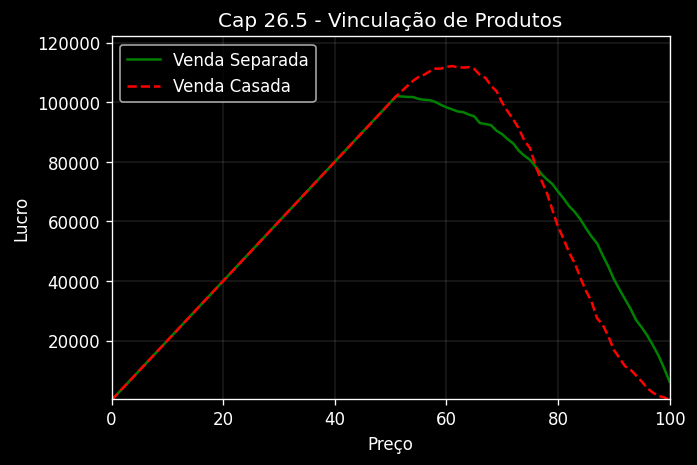

In [92]:
fig = plt.figure(dpi=120)
ax = plt.axes()
ax.grid(color='gray',linewidth=.2)
ax.set_ylabel('Lucro')
ax.set_xlabel('Preço')

plt.title('Cap 26.5 - Vinculação de Produtos')

plt.plot(dataplot['p'],dataplot['lucro_sep'],'-',color='green', label='Venda Separada')
plt.plot(dataplot['p'],dataplot['lucro_cas'],'--',color='red', label='Venda Casada')

plt.legend(loc='upper left')
plt.ylim(500,(max(dataplot['lucro_cas'])+10000))
plt.xlim(0,100)

plt.show()
